## This is the project for DWDM-AI Course made by


1.   **Rvs Satyanand 106118083**
2.   **Shrey Garg 106118087**
3.   **Subhradeep Saha 106118095**
4.   **Yash Shah 106118107**


### **Here we have made use of the heart attack eda dataset to predict the chances of heart attack based on the features given below**



# Features:

1. age: Age of the patient in years

2. sex: Sex of the patient (1 = male; 0 = female)

3. cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
(Its a type of chest pain measurement used in the medical field.)
4. trtbps: Resting blood pressure (in mm Hg)

5. chol: Cholestoral in mg/dl fetched via BMI sensor

6. fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

7. restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalachh: Maximum heart rate achieved

9. oldpeak: Previous peak

10. slp: Slope

11. caa: Number of major vessels

12. thall: Thalium Stress Test result, (0-3)

13. exng: Exercise induced angina, 1 = Yes, 0 = No

14. output:  0 = less chance of heart attack, 1 = more chance of heart attack

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


!pip install pywaffle
from pywaffle import Waffle

import xgboost as xgb

     |████████████████████████████████| 532kB 32.5MB/s 


# Loading the dataset (heart.csv)

In [2]:
!gdown --id "1PZrvfcuHDSCP5wSRLJcVi9Ser_XR9cYs"

data = pd.read_csv('./heart.csv')
data.head()

Downloading...
From: https://drive.google.com/uc?id=1PZrvfcuHDSCP5wSRLJcVi9Ser_XR9cYs
To: /content/heart.csv
100% 11.3k/11.3k [00:00<00:00, 19.9MB/s]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**I'm going to take copy of original data for visualization**

In [3]:
df1 = data.copy()

# Data Preprocessing

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df1.shape

(303, 14)

In [6]:
df1.duplicated().sum()

1

In [7]:
df1[df1.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df1.drop_duplicates(inplace=True) # dropping duplicated rows
df1.reset_index(drop=True, inplace=True)
df1.shape

(302, 14)

In [9]:
df1.isnull().sum() # Checking null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Now, I'm going to change column values for better understanding**

In [10]:
df1['exng'] = df1['exng'].map({1:'yes',0:'no'})
df1['cp'] = df1['cp'].map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
df1['fbs'] = df1['fbs'].map({1:'true',0:'false'})
df1['sex'] = df1['sex'].map({1:'male',0:'female'})
df1['restecg'] = df1['restecg'].map({0:'normal',1:'having ST-T wave abnormality',2:'showing probable or definite left ventricular hypertrophy'})
df1['output'] = df1['output'].map({0:'less chance of heart attack',1:'more chance of heart attack'})
df1.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
178,57,male,typical angina,150,276,false,normal,112,yes,0.6,1,1,1,less chance of heart attack
47,47,male,non-anginal pain,138,257,false,normal,156,no,0.0,2,0,2,more chance of heart attack
40,51,female,non-anginal pain,140,308,false,normal,142,no,1.5,2,1,2,more chance of heart attack
189,51,female,typical angina,130,305,false,having ST-T wave abnormality,142,yes,1.2,1,0,3,less chance of heart attack
67,45,female,atypical angina,130,234,false,normal,175,no,0.6,1,0,2,more chance of heart attack


# **Data Distribution!**

In [11]:
heart_disease = df1['output'].value_counts().values[0]
heart_disease_no =  df1['output'].value_counts().values[1]

no_percent = int(round(heart_disease_no/(heart_disease+heart_disease_no) * 100, 0))
yes_percent = int(round(heart_disease/(heart_disease+heart_disease_no)* 100, 0))

print("Number of postivie result ", yes_percent,"%")
print("Number of negative result ", no_percent,"%")

 

Number of postivie result  54 %
Number of negative result  46 %


As 54% of the person have heart attack so data is almost balanced so no need to balance the data.

# Countplot

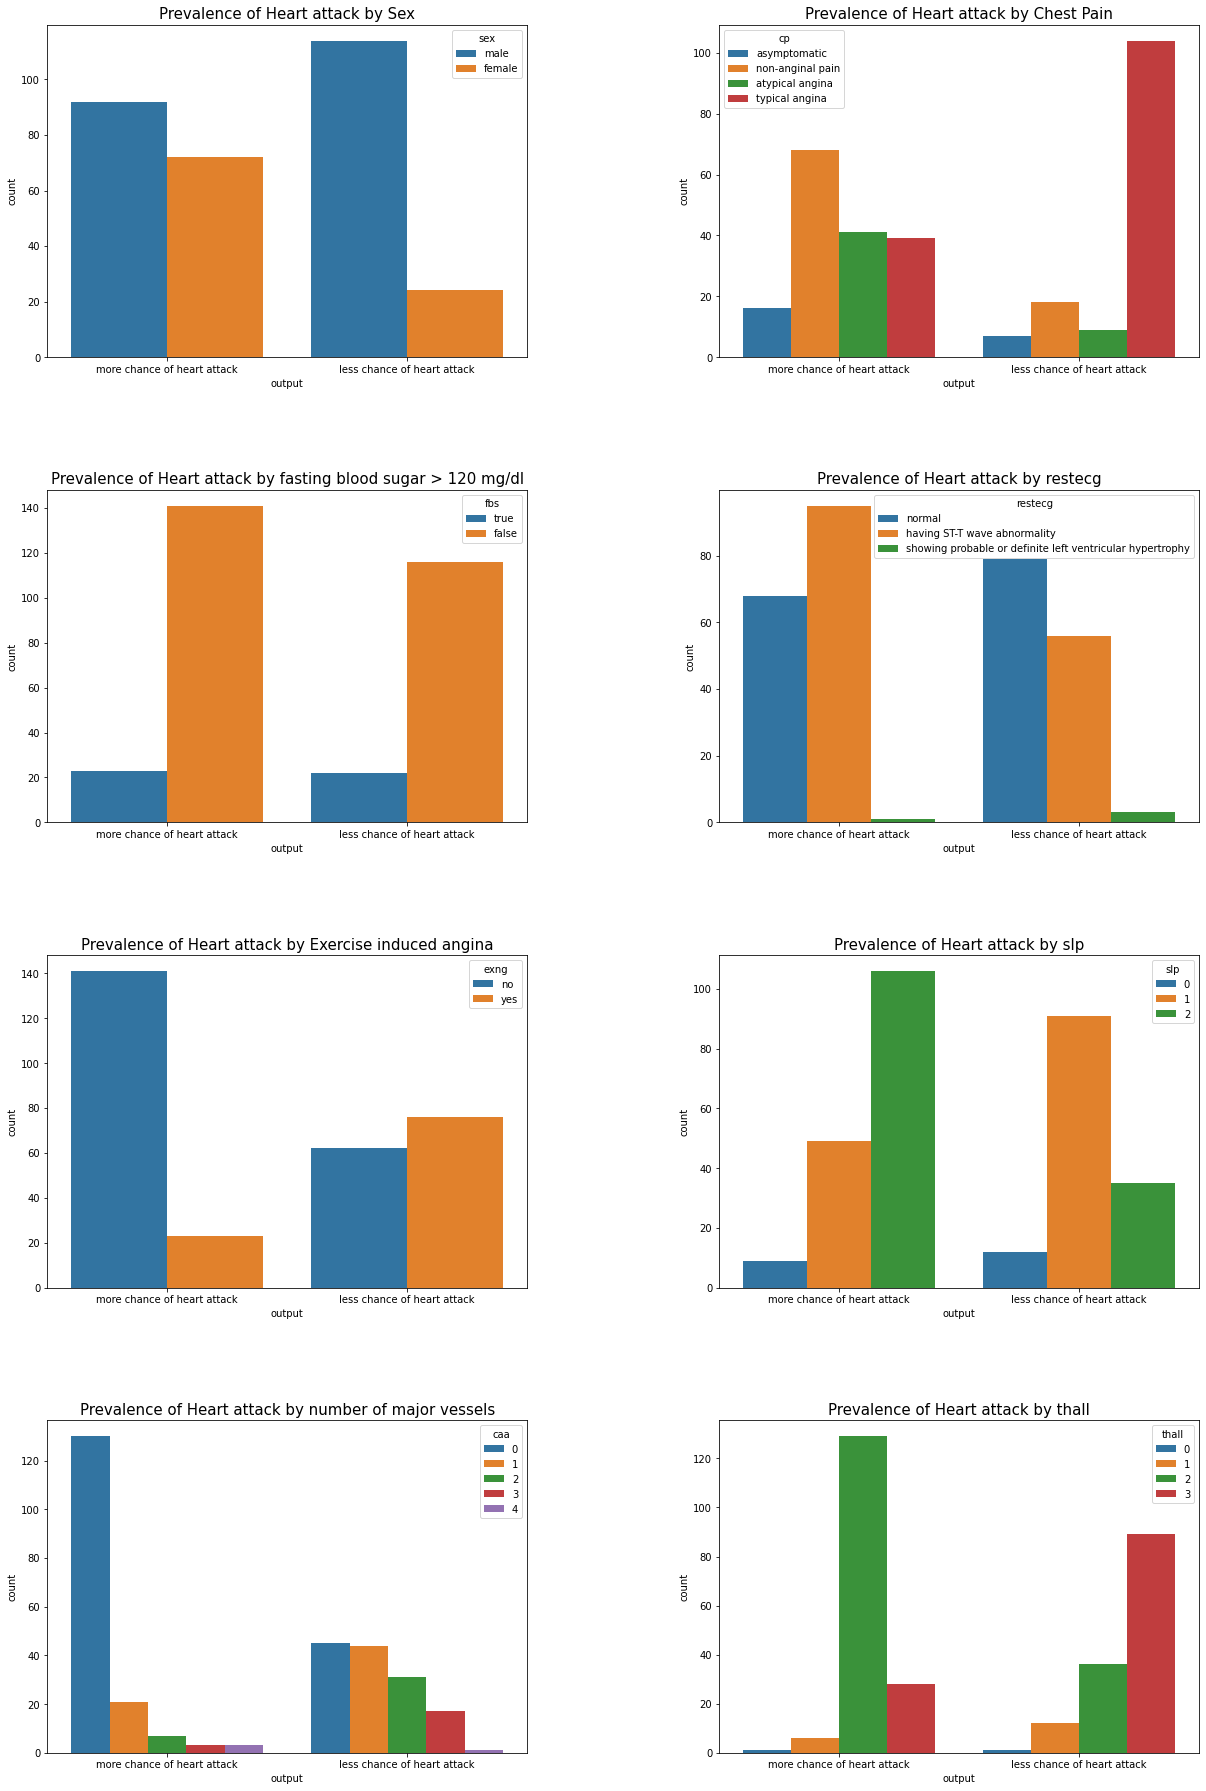

In [12]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(4,2,1)
plt.title('Prevalence of Heart attack by Sex',fontsize=15)
sns.countplot(df1['output'], hue=df1['sex'])

plt.subplot(4,2,2)
plt.title('Prevalence of Heart attack by Chest Pain',fontsize=15)
sns.countplot(df1['output'], hue=df1['cp'])

plt.subplot(4,2,3)
plt.title('Prevalence of Heart attack by fasting blood sugar > 120 mg/dl',fontsize=15)
sns.countplot(df1['output'],hue=df1['fbs'])

plt.subplot(4,2,4)
plt.title('Prevalence of Heart attack by restecg',fontsize=15)
sns.countplot(df1['output'],hue = df1['restecg'])

plt.subplot(4,2,5)
plt.title('Prevalence of Heart attack by Exercise induced angina',fontsize=15)
sns.countplot(df1['output'],hue=df1['exng'])

plt.subplot(4,2,6)
plt.title('Prevalence of Heart attack by slp',fontsize=15)
sns.countplot(df1['output'],hue=df1['slp'])

plt.subplot(4,2,7)
plt.title('Prevalence of Heart attack by number of major vessels',fontsize=15)
sns.countplot(df1['output'],hue=df1['caa'])

plt.subplot(4,2,8)
plt.title('Prevalence of Heart attack by thall',fontsize=15)
sns.countplot(df1['output'],hue=df1['thall'])

 </br></br>
**Some Important Insights:** </br>

1.Person having high chest pain are more probable to suffer from Heart Attack.</br>

2.Person having higher heart rate are more probable to suffer from Heart Attack.
</br>

3.Males are more probable to suffer from heart attack as compare to Females.</br>

4.Person doesnot have exercied indeced enginal are higly probable to suffer </br>from heart attack.</br>

5.Person having chest pain of Non-anginal type are more probable to suffer from Heart Attack.</br>

6.People Showing Electrocardiograph of ST-T wave normality type are more probable to suffer from Heart Attack.</br>

# **Prediction**

Taking copy from Original Data

In [13]:
df2 = data.copy()
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Dropping Duplicate values

In [14]:
df2.drop_duplicates(inplace=True)
df2.reset_index(drop=True, inplace=True)
df2.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [15]:
df2.reset_index(drop=True,inplace=True)
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now, I'm going to perform baseline modelling

In [16]:
x = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values
print(x[0:5])
print(y[0:5])

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]
[1 1 1 1 1]


## Standardization

In [17]:
# Spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[0:3])

[[-1.30504994 -1.4186261   0.98544689 -0.55988902 -0.63287305 -0.40527917
   0.90503556  0.65868689 -0.6983225  -0.73105097 -0.61492051 -0.70674006
  -0.49876142]
 [ 1.25925059 -1.4186261   0.98544689  0.81698091  0.59425361 -0.40527917
  -0.97525383  0.10822916 -0.6983225  -0.89828712 -0.61492051  0.29516791
  -0.49876142]
 [ 0.36731998  0.70490738  0.98544689  0.47276343 -0.67063079  2.46743496
  -0.97525383  0.65868689 -0.6983225  -0.89828712  0.99590387 -0.70674006
  -0.49876142]]


## Machine Learning Models

In [18]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),xgb.XGBClassifier()]
models = dict(zip(key,value))
print(models)

{'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'SVC': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,


###Helper Variables

In [19]:
predicted =[]
i = 0

### LogisticRegression

In [20]:
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)
acc = accuracy_score(y_test,predict)
predicted.append(acc)
print(key[0],acc)


LogisticRegression 0.8688524590163934


### KNeighborsClassifier

In [21]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
predict = model.predict(x_test)
acc = accuracy_score(y_test,predict)
predicted.append(acc)
print(key[1],acc)


KNeighborsClassifier 0.9180327868852459


### SVC Support Vector Machines

In [22]:
model = SVC()
model.fit(x_train,y_train)
predict = model.predict(x_test)
acc = accuracy_score(y_test,predict)
predicted.append(acc)
print(key[2],acc)


SVC 0.9344262295081968


###DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predict = model.predict(x_test)
acc = accuracy_score(y_test,predict)
predicted.append(acc)
print(key[3],acc)


DecisionTreeClassifier 0.7704918032786885


###RandomForestClassifier

In [24]:
model = RandomForestClassifier(verbose=100)
model.fit(x_train,y_train)
predict = model.predict(x_test)
acc = accuracy_score(y_test,predict)
predicted.append(acc)
print(key[4],acc)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 100
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 100
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 100
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 100
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
building tree 5 of 100
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 6 of 100
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
building tree 7 of 100
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
building tree 8 of 100
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
building tree 9 of 100
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining: 

###GradientBoostingClassifier


In [25]:
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)
acc = accuracy_score(y_test,predict)
predicted.append(acc)
print(key[5],acc)


GradientBoostingClassifier 0.8688524590163934


### AdaBoostClassifier

In [26]:
model = AdaBoostClassifier()
model.fit(x_train,y_train)
predict = model.predict(x_test)
acc = accuracy_score(y_test,predict)
predicted.append(acc)
print(key[6],acc)


AdaBoostClassifier 0.9180327868852459


###XGBClassifier

In [27]:
model = xgb.XGBClassifier()
model.fit(x_train,y_train)
predict = model.predict(x_test)
acc = accuracy_score(y_test,predict)
predicted.append(acc)
print(key[7],acc)

XGBClassifier 0.8360655737704918


In [28]:

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
model = Sequential()
model.add(Dense(13,input_dim=13,activation="relu",kernel_regularizer="l2"))
model.add(Dense(8,activation="relu",kernel_regularizer="l2"))
model.add(Dense(4,activation="relu",kernel_regularizer="l2"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train,y_train,epochs=100,verbose=0)

In [31]:
eval = model.evaluate(x_test,y_test)
print(eval)
key.append("Neural Networks")
predicted.append(eval[1])

2/2 [==============================] - 0s 6ms/step - loss: 0.4839 - accuracy: 0.8525
[0.4839456379413605, 0.8524590134620667]


## **Accuracy Visualization**

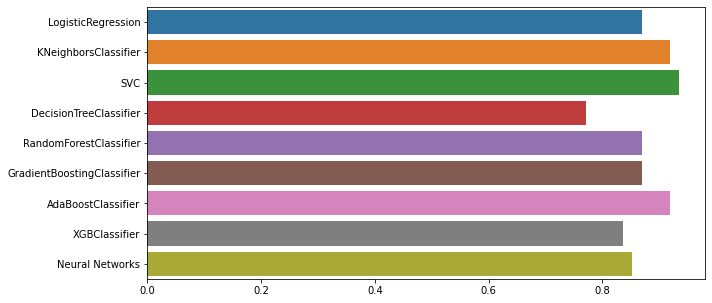

In [32]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key)

It shows SVC is the best fit for this dataset because the accuracy 93%. Let's try to increase the efficiency by Hyper tuning.

## Hyper tuning

In [33]:
svc = SVC(kernel = 'rbf',C = 1, degree = 5, random_state = 0)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,svc_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,svc_pred))

Accuracy: 0.9344262295081968
Confusion matrix:
 [[26  1]
 [ 3 31]]


The accuracy remains same.

## Visualizing Best fit model

We are using sns distplot which is a data distribution of the predicted vs actual heartattack rate against the density distribution

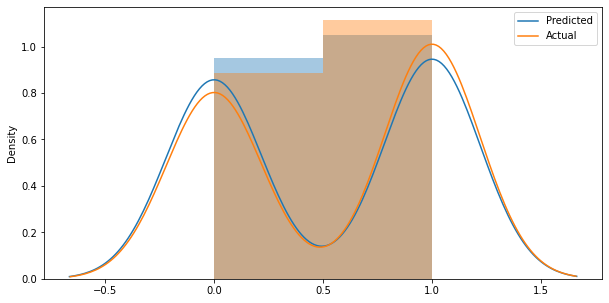

In [34]:
plt.figure(figsize = (10,5))
sns.distplot(svc_pred, label = 'Predicted')
sns.distplot(y_test, label = 'Actual')

plt.legend(["Predicted", "Actual"])
plt.show()
